In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = './picher_stats_2017.csv'
batter_file_path = './batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [6]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [7]:
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [8]:
print(picher.shape)

(152, 22)


In [9]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인합니다.

{'Arial',
 'Bahnschrift',
 'Calibri',
 'Cambria',
 'Candara',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Corbel',
 'Courier New',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Ebrima',
 'Franklin Gothic Medium',
 'Gabriola',
 'Gadugi',
 'Georgia',
 'HCR Batang',
 'HCR Batang Ext',
 'HCR Batang ExtB',
 'HCR Dotum',
 'HCR Dotum Ext',
 'HoloLens MDL2 Assets',
 'HyhwpEQ',
 'Impact',
 'Ink Free',
 'Javanese Text',
 'Leelawadee UI',
 'Lucida Console',
 'Lucida Sans Unicode',
 'MBatang',
 'MDotum',
 'MGungHeulim',
 'MGungJeong',
 'MHunmin',
 'MJemokBatang',
 'MJemokGothic',
 'MSugiHeulim',
 'MSugiJeong',
 'MV Boli',
 'Malgun Gothic',
 'Marlett',
 'Microsoft Himalaya',
 'Microsoft New Tai Lue',
 'Microsoft PhagsPa',
 'Microsoft Sans Serif',
 'Microsoft Tai Le',
 'Microsoft Yi Baiti',
 'Mongolian Baiti',
 'Myanmar Text',
 'NewJumja',
 'Nirmala UI',
 'Palatino Linotype',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXS

In [32]:
mpl.rc('font', family='Malgun Gothic') # 자신의 OS에 존재하는 한글 폰트를 선택합니다. 없는경우, 위의 링크에서 한글폰트 설치 후 실행합니다.

In [11]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

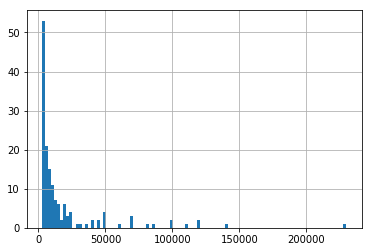

In [12]:
picher['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력합니다.

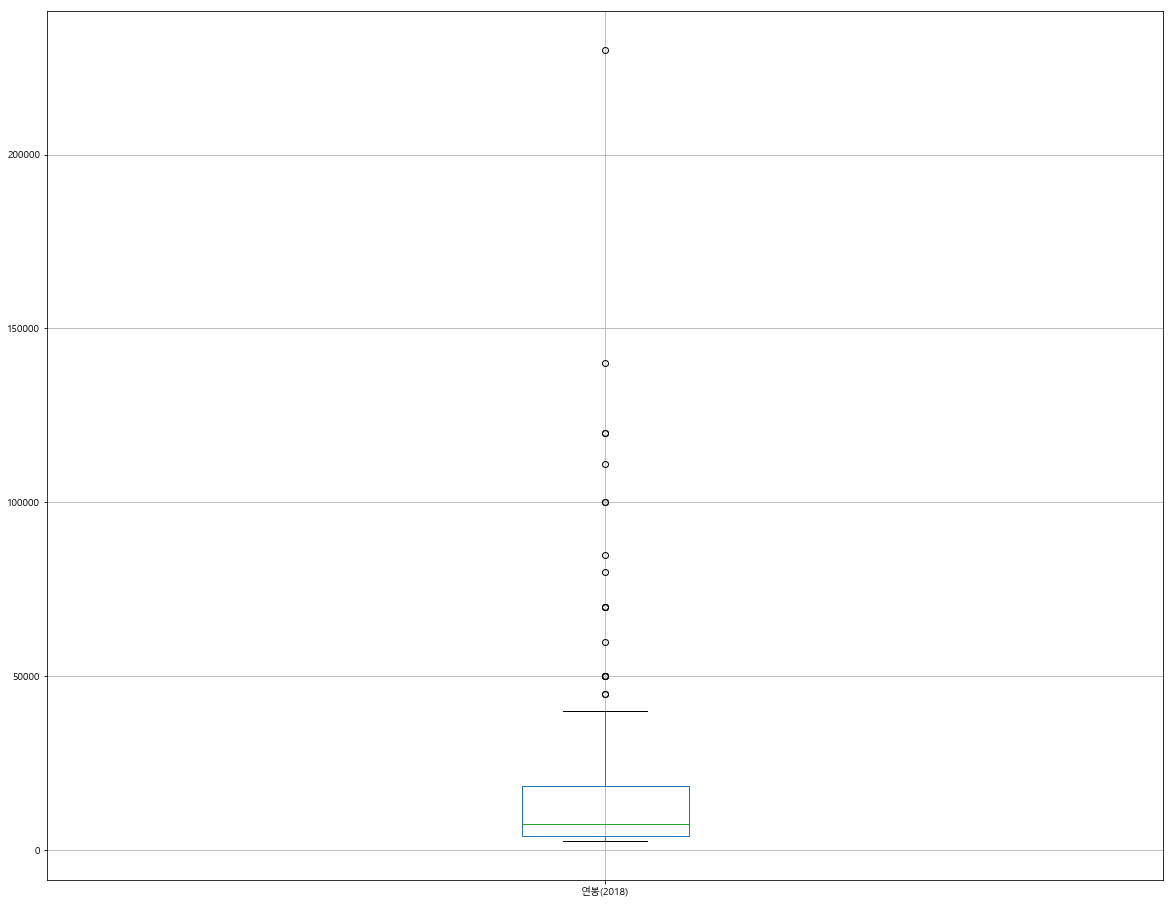

In [18]:
picher.boxplot(column=['연봉(2018)']) # 연봉의 Boxplot을 출력합니다.

In [19]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [20]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

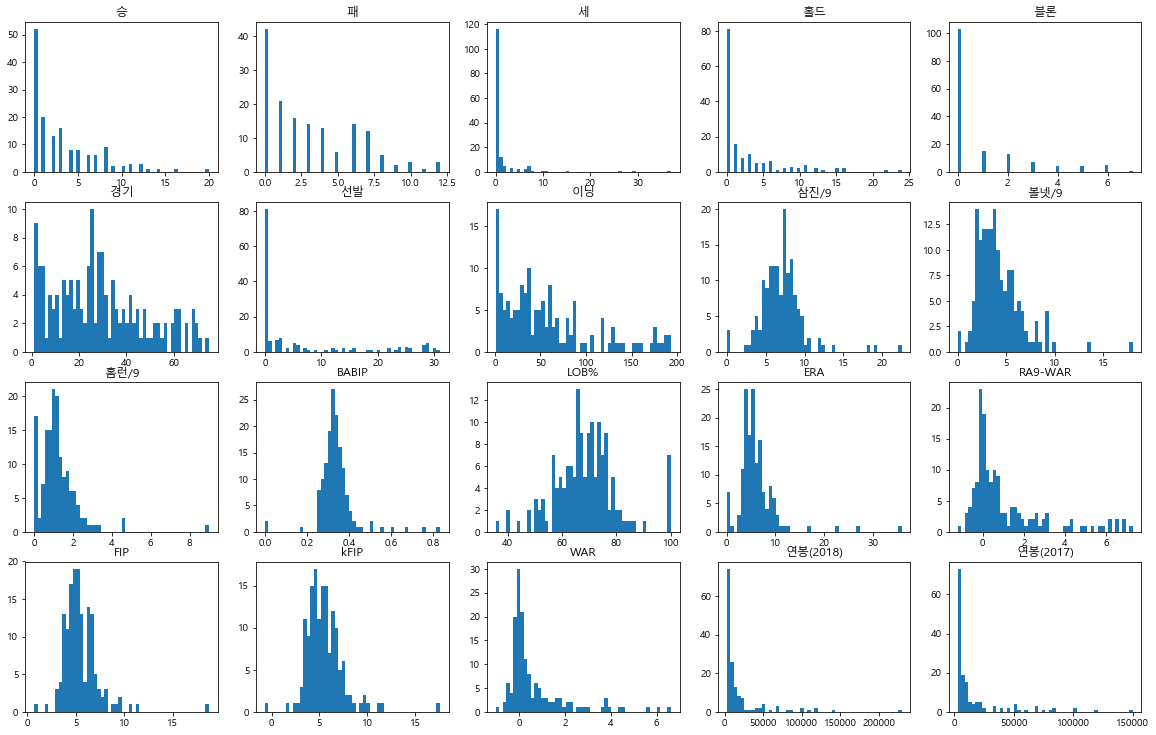

In [21]:
plot_hist_each_column(picher_features_df)

In [30]:
co = picher.corr(method='pearson')
co

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
승,1.000000,0.710749,0.053747,0.092872,0.105281,0.397074,0.773560,0.906093,0.078377,-0.404710,-0.116147,-0.171111,0.131178,-0.271086,0.851350,-0.303133,-0.314159,0.821420,0.712463,0.629710
패,0.710749,1.000000,0.066256,0.098617,0.121283,0.343147,0.771395,0.829018,0.031755,-0.386313,-0.064467,-0.133354,-0.020994,-0.188036,0.595989,-0.233416,-0.238688,0.625641,0.469831,0.429227
세,0.053747,0.066256,1.000000,0.112716,0.605229,0.434290,-0.177069,0.020278,0.170436,-0.131394,-0.073111,-0.089212,0.167557,-0.150348,0.167669,-0.199746,-0.225259,0.084151,0.211169,0.262664
홀드,0.092872,0.098617,0.112716,1.000000,0.490076,0.715527,-0.285204,0.024631,0.186790,-0.146806,-0.076475,-0.104307,0.048123,-0.155712,0.003526,-0.211515,-0.237353,-0.038613,-0.017347,-0.001213
블론,0.105281,0.121283,0.605229,0.490076,1.000000,0.630526,-0.264160,0.014176,0.188423,-0.137019,-0.064804,-0.112480,0.100633,-0.160761,0.008766,-0.209014,-0.237815,-0.058213,0.097759,0.146584
경기,0.397074,0.343147,0.434290,0.715527,0.630526,1.000000,-0.037443,0.376378,0.192487,-0.364293,-0.113545,-0.241608,0.105762,-0.320177,0.281595,-0.345351,-0.373777,0.197836,0.209941,0.225357
선발,0.773560,0.771395,-0.177069,-0.285204,-0.264160,-0.037443,1.000000,0.894018,-0.055364,-0.312935,-0.058120,-0.098909,0.041819,-0.157775,0.742258,-0.151040,-0.142685,0.758846,0.560472,0.488559
이닝,0.906093,0.829018,0.020278,0.024631,0.014176,0.376378,0.894018,1.000000,0.037343,-0.451101,-0.107063,-0.191514,0.103369,-0.285392,0.853354,-0.296768,-0.302288,0.832609,0.658901,0.586874
삼진/9,0.078377,0.031755,0.170436,0.186790,0.188423,0.192487,-0.055364,0.037343,1.000000,0.109345,0.216017,0.457523,-0.071284,0.256840,0.102963,-0.154857,-0.317594,0.151791,0.103774,0.104948
볼넷/9,-0.404710,-0.386313,-0.131394,-0.146806,-0.137019,-0.364293,-0.312935,-0.451101,0.109345,1.000000,0.302251,0.276009,-0.150837,0.521039,-0.398586,0.629833,0.605008,-0.394131,-0.329149,-0.332379


In [29]:
col = ['승','패','선발','이닝','RA9-WAR','WAR','연봉(2017)','연봉(2018)']
corr = picher[col].corr(method = 'pearson')
corr

,승,패,선발,이닝,RA9-WAR,WAR,연봉(2017),연봉(2018)
승,1.000000,0.710749,0.773560,0.906093,0.851350,0.821420,0.629710,0.712463
패,0.710749,1.000000,0.771395,0.829018,0.595989,0.625641,0.429227,0.469831
선발,0.773560,0.771395,1.000000,0.894018,0.742258,0.758846,0.488559,0.560472
이닝,0.906093,0.829018,0.894018,1.000000,0.853354,0.832609,0.586874,0.658901
RA9-WAR,0.851350,0.595989,0.742258,0.853354,1.000000,0.917299,0.643375,0.740332
WAR,0.821420,0.625641,0.758846,0.832609,0.917299,1.000000,0.675794,0.791388
연봉(2017),0.629710,0.429227,0.488559,0.586874,0.643375,0.675794,1.000000,0.930314
연봉(2018),0.712463,0.469831,0.560472,0.658901,0.740332,0.791388,0.930314,1.000000


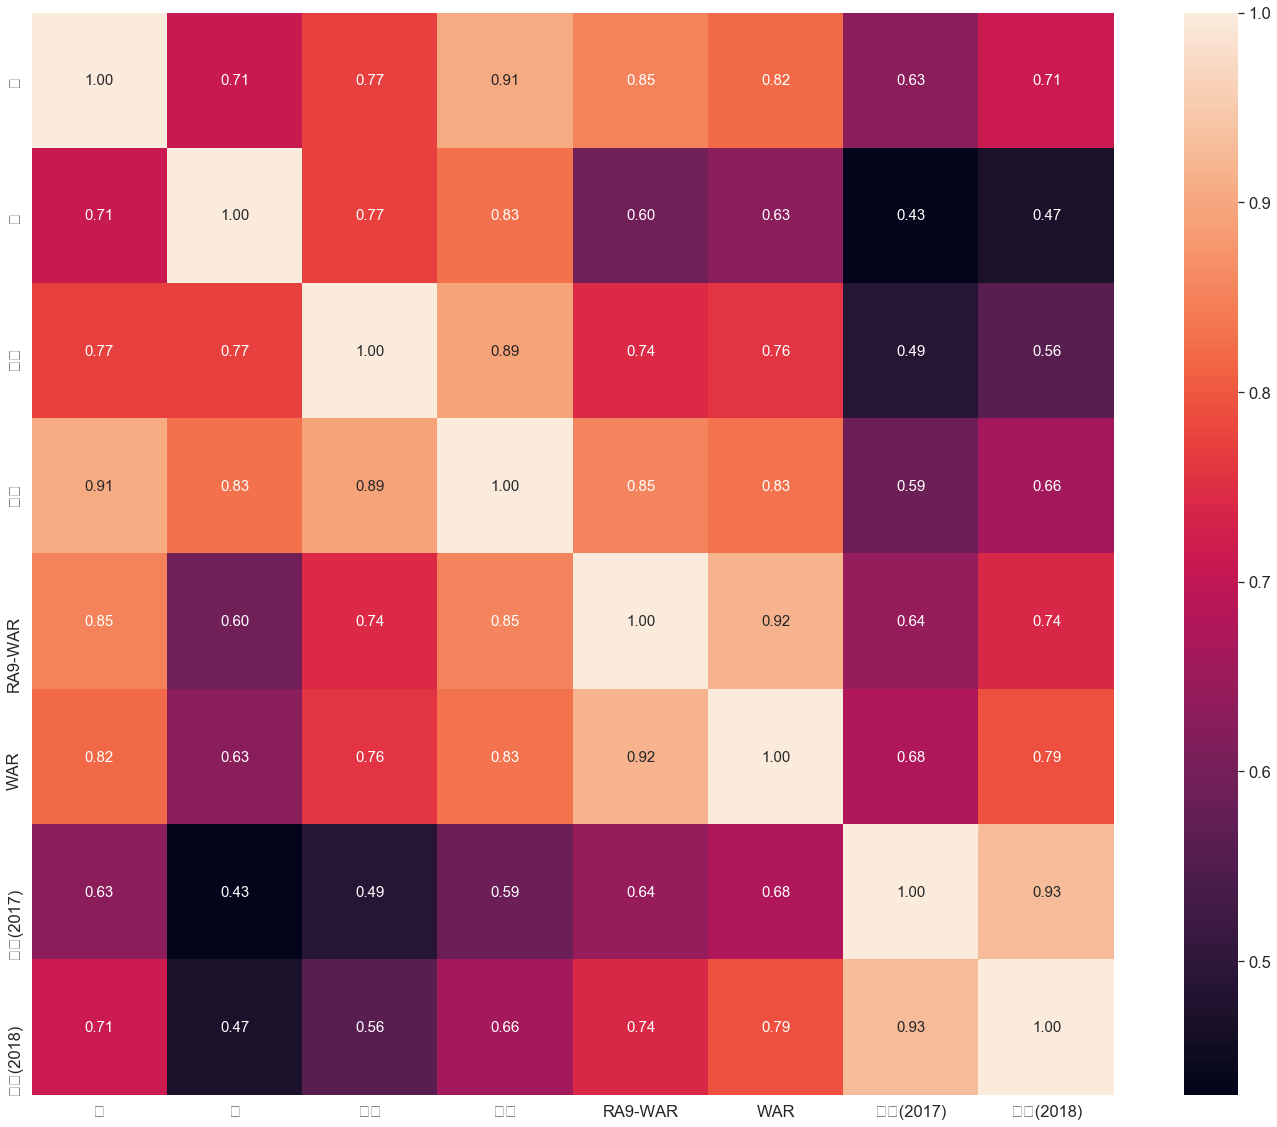

In [36]:
import seaborn as sns

plt.rc('font', family='Malgun Gothic') 

# corr 행렬 히트맵을 시각화합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=col,
            xticklabels=col)

plt.tight_layout()
plt.show()

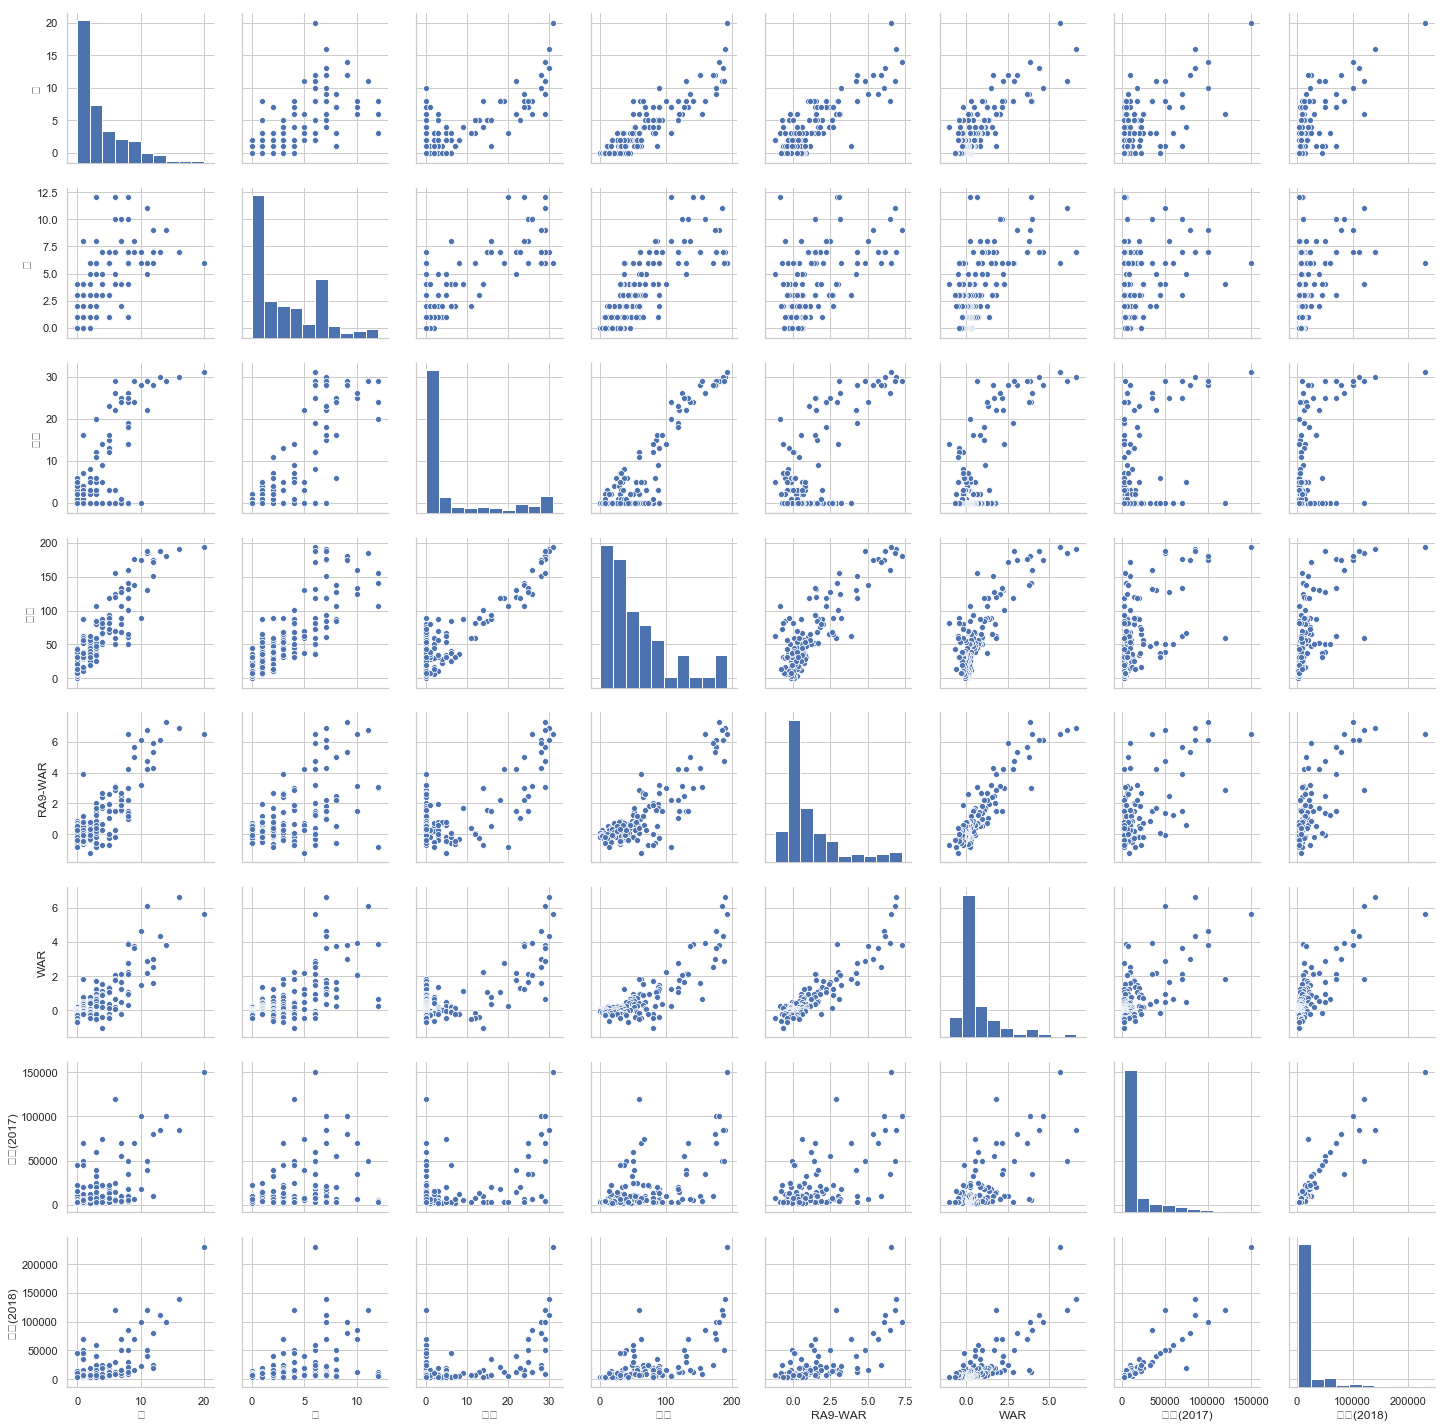

In [35]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(picher[col], height=2.5)
plt.show()